# Import Libraries

In [1]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install scikit-learn==1.2.0 imbalanced-learn==0.10.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import dalex as dx

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/breell/dataset/refs/heads/main/incom2024_delay_example_dataset.csv')
df_desc = pd.read_csv('https://raw.githubusercontent.com/breell/dataset/refs/heads/main/incom2024_delay_variable_description.csv')# dataset columns description
pd.set_option('display.max_columns', None)
df_desc

,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category
5,customer_city,categorical,City where the customer made the purchase
6,customer_country,categorical,Country where the customer made the purchase
7,customer_id,numerical,Customer ID
8,customer_segment,categorical,"Types of Customers Consumer, Corporate, Home O..."
9,customer_state,categorical,State to which the store where the purchase is...


In [4]:
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,customer_zipcode,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,725.0000,3.0,Footwear,18.359064,-66.370575,Europe,Viena,Austria,12073.33600,2015-08-12 00:00:00+01:00,15081.2890,191.0,12.623338,0.13,38030.996,99.99,0.41,1.0,99.99,84.99157,32.083145,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,92745.1600,7.0,Fan Shop,37.636528,-121.119630,LATAM,Buenos Aires,Argentina,5111.04800,2017-02-10 00:00:00+00:00,56444.6840,1073.0,16.500000,0.07,142621.780,199.99,0.48,1.0,199.99,181.99000,91.235870,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,2457.7297,7.0,Fan Shop,18.294100,-66.037056,Europe,Burnie,France,4134.76500,2015-01-01 00:00:00+00:00,7508.5713,1014.0,6.600000,0.06,18723.178,49.98,0.09,2.0,99.96,93.81015,6.965549,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,725.0000,4.0,Apparel,18.202435,-66.370510,LATAM,Santa Ana,El Salvador,495.18726,2017-05-31 00:00:00+01:00,56196.9260,365.0,16.942171,0.16,141654.580,59.99,-0.80,2.0,119.98,99.89060,-95.401400,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,95118.6000,7.0,Fan Shop,38.719500,-122.319720,LATAM,Blumenau,Mexico,1758.91190,2015-03-28 00:00:00+00:00,5565.5796,1073.0,29.990000,0.15,14204.896,199.99,0.27,1.0,199.99,171.07587,44.569000,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
profit_per_order,15549.0,22.604542,99.265198,-3442.500000,7.562795,31.693370,63.872166,911.800000
sales_per_customer,15549.0,179.888256,113.727323,8.351162,104.397330,165.944170,242.440930,1939.990000
category_id,15549.0,31.461342,15.303616,2.000000,18.000000,29.000000,45.000000,76.000000
customer_id,15549.0,6583.279789,4114.273782,1.000000,3119.983200,6429.229000,9642.381000,20757.000000
customer_zipcode,15549.0,35458.234968,37343.702033,603.000000,725.000000,19145.775000,77502.820000,99205.000000
department_id,15549.0,5.413462,1.581550,2.000000,4.000000,5.000000,7.000000,12.000000
latitude,15549.0,29.677619,9.877876,-33.937553,18.263327,33.435677,39.277313,48.781933
longitude,15549.0,-84.512318,20.681015,-158.025990,-98.088170,-76.580800,-66.370575,115.263080
order_customer_id,15549.0,6586.810354,4101.324290,1.000000,3177.568800,6308.530000,9703.070000,20757.000000
order_id,15549.0,35718.970019,21071.742668,1.000000,16530.752000,35391.336000,55236.910000,77204.000000


- profit_per_order has a minimum value of -3442.50. This indicates an order with a large loss.  
- order_item_discount_rate shows an average discount of 10.27% with a maximum of 50%. High discounts can lead to negative profits.  
- order_item_profit_ratio has a minimum value of -2.75. A negative profit ratio means that total costs are greater than revenue.  
- sales_per_customer varies greatly, with a minimum value of 8.35 and a maximum of 1939.99.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [7]:
cat_cols = df.select_dtypes(include=['object', 'category']).shape[1]
num_cols = df.select_dtypes(include=['int64', 'float64']).shape[1]
print('total categorical columns :', cat_cols)
print('total numerical columns :',num_cols)

total categorical columns : 17
total numerical columns : 24


# Exploratory Data Analysis

In [8]:
df.describe()

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price,label
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,22.604542,179.888256,31.461342,6583.279789,35458.234968,5.413462,29.677619,-84.512318,6586.810354,35718.970019,684.360189,20.782118,0.102717,89048.223248,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,685.213286,31.387606,136.629368,0.349283
std,99.265198,113.727323,15.303616,4114.273782,37343.702033,1.581550,9.877876,20.681015,4101.324290,21071.742668,330.008136,22.953833,0.070101,52235.717673,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,330.778230,15.256620,133.366285,0.826623
min,-3442.500000,8.351162,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025990,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,19.000000,2.000000,9.990000,-1.000000
25%,7.562795,104.397330,18.000000,3119.983200,725.000000,4.000000,18.263327,-98.088170,3177.568800,16530.752000,403.000000,6.000000,0.040000,41487.840000,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,403.000000,18.000000,50.000000,0.000000
50%,31.693370,165.944170,29.000000,6429.229000,19145.775000,5.000000,33.435677,-76.580800,6308.530000,35391.336000,627.000000,14.588252,0.100000,89075.270000,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,627.000000,29.000000,59.990000,1.000000
75%,63.872166,242.440930,45.000000,9642.381000,77502.820000,7.000000,39.277313,-66.370575,9703.070000,55236.910000,1004.000000,30.000000,0.160000,137768.750000,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,1004.000000,45.000000,199.990000,1.000000
max,911.800000,1939.990000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263080,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180501.860000,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1363.000000,76.000000,1999.990000,1.000000


In [9]:
# check missing values
df.isnull().sum()

,0
payment_type,0
profit_per_order,0
sales_per_customer,0
category_id,0
category_name,0
customer_city,0
customer_country,0
customer_id,0
customer_segment,0
customer_state,0


In [10]:
# check duplicated value
df.duplicated().sum()

0

no missing or duplicated values on this dataset

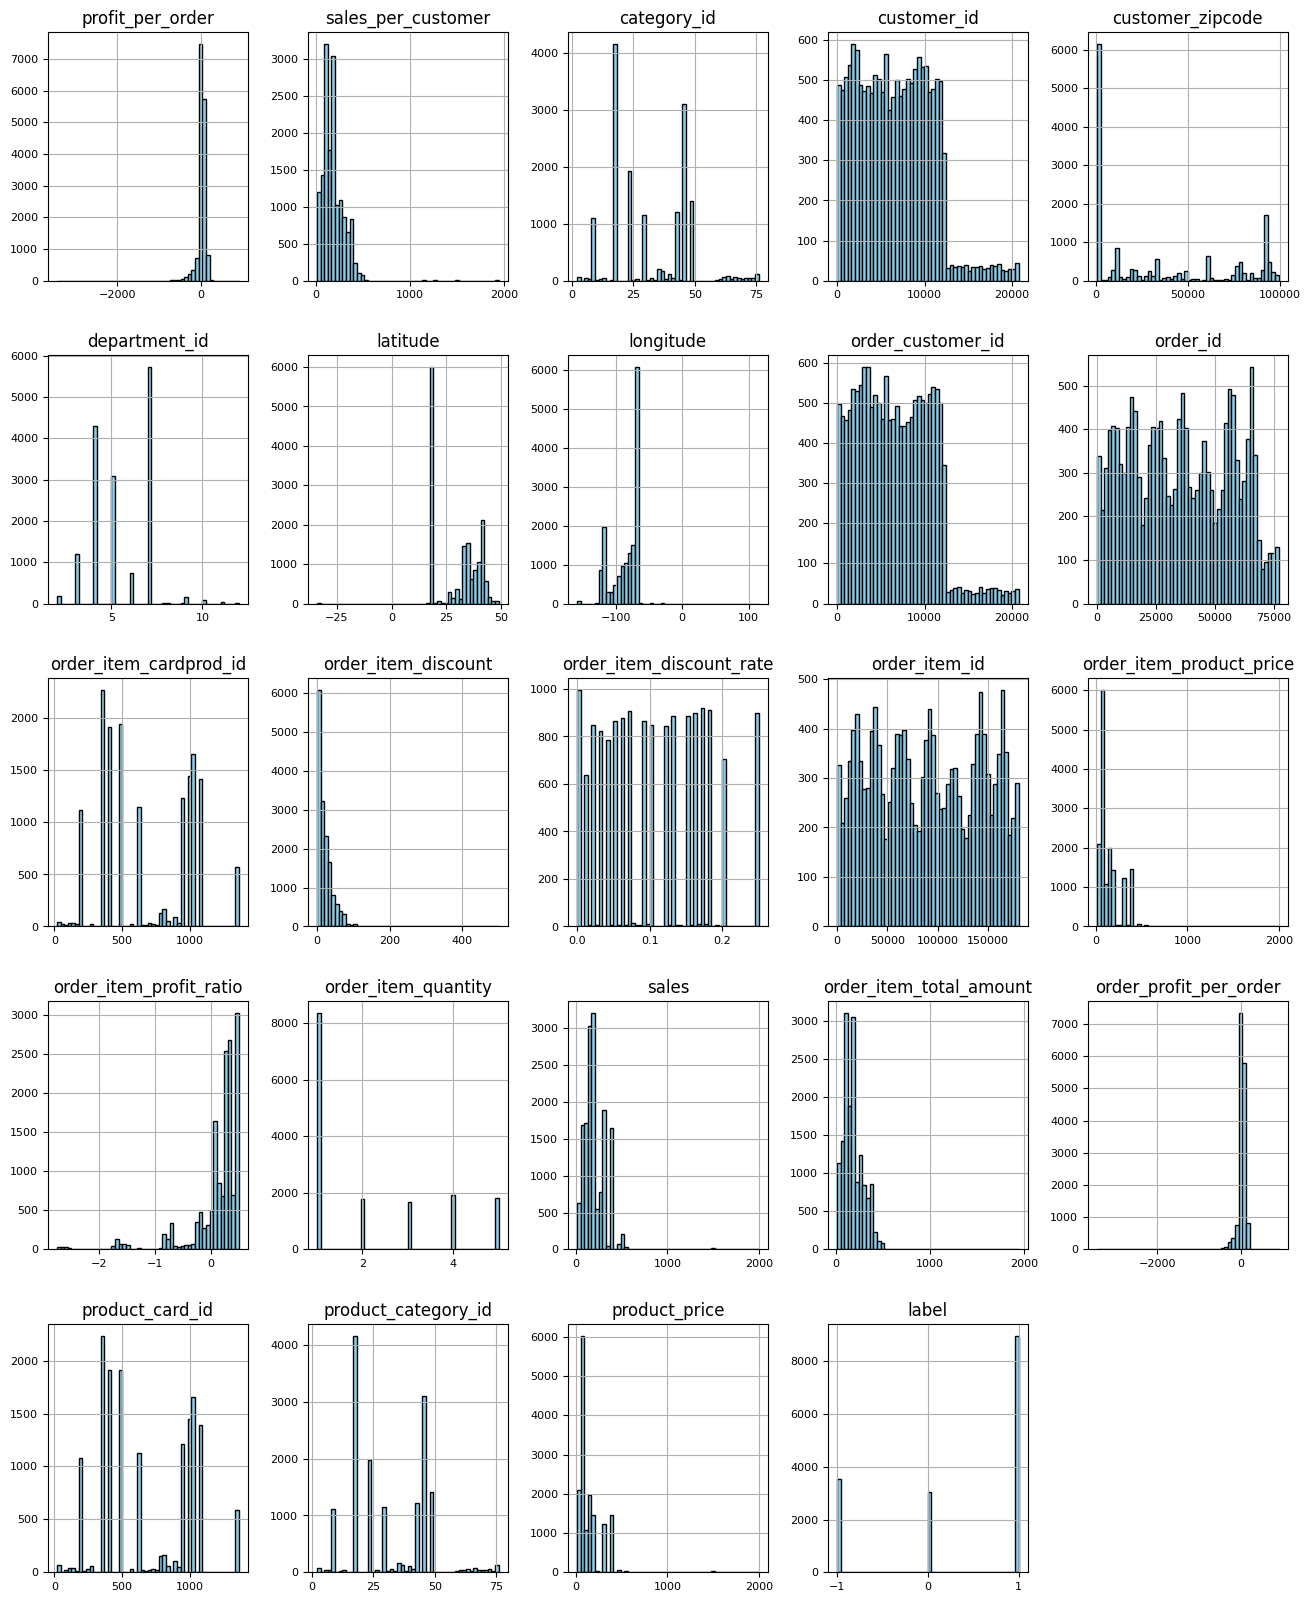

In [11]:
# showing all histogram plot on numerical columns
df.hist(figsize=(16, 20), bins=50, color='skyblue', edgecolor='black', xlabelsize=8, ylabelsize=8);

let's take a closer look.

## Profit Analysis

Text(0.5, 1.0, 'profit_per_order')

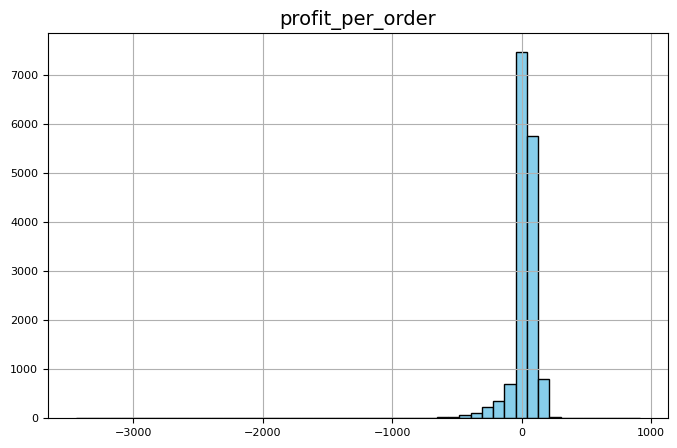

In [12]:
# histplot profit per order
df['profit_per_order'].hist(figsize=(8, 5), bins=50, xlabelsize=8, color='skyblue', edgecolor='black', ylabelsize=8)
plt.title('profit_per_order', fontsize=14)

profit_per_order (Earnings per order placed)
Most of the profit values ​​are close to zero, but there are some outliers that have large negative or positive values.
There may be products or orders that are very unprofitable (negative profit) or very profitable (large positive profit).

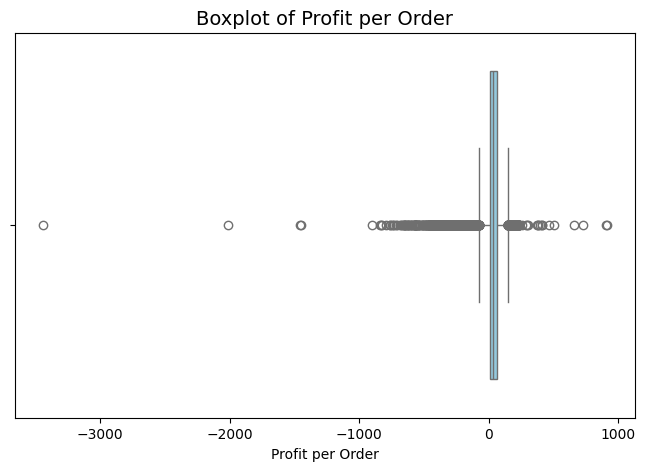

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['profit_per_order'], color='skyblue')
plt.title('Boxplot of Profit per Order', fontsize=14)
plt.xlabel('Profit per Order', fontsize=10)
plt.show()

In [14]:
# filtering negative profit
negative_profit = df[df['profit_per_order'] < 0]
print("Data with negative profit:")
negative_profit.describe()

Data with negative profit:


,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,order_item_cardprod_id,order_item_discount,order_item_discount_rate,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price,label
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,-107.829924,178.019649,31.129855,6589.779867,35798.712042,5.361988,29.668837,-84.750564,6594.088894,35395.620553,676.605261,21.064357,0.103473,88203.345632,136.001416,-0.627529,2.173443,199.114815,178.282705,-106.553348,677.733398,31.036511,134.671578,0.363107
std,151.164511,110.225585,15.337795,4110.791128,37300.707473,1.565230,9.959001,20.484769,4091.810475,20911.936227,329.915932,25.099002,0.070048,51802.692351,135.625271,0.642284,1.478036,124.670989,109.751029,169.131110,330.918275,15.280243,128.204147,0.827825
min,-3442.500000,8.351162,2.000000,1.000000,603.911800,2.000000,-33.937553,-158.025990,1.000000,1.009854,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.992503,8.445535,-3442.500000,19.000000,2.000000,9.990000,-1.000000
25%,-146.122960,104.102115,18.000000,3149.184800,725.000000,4.000000,18.261113,-98.035770,3208.483725,16288.179000,403.000000,6.000000,0.040000,41077.624750,49.980000,-0.800000,1.000000,119.980000,104.807298,-146.041223,403.000000,18.000000,49.980000,0.000000
50%,-50.587629,163.932340,29.000000,6458.175500,20825.153000,5.000000,33.451308,-76.987565,6310.921350,34379.612500,627.000000,15.000000,0.100000,85750.670000,59.990000,-0.362316,1.000000,199.920000,163.968935,-51.341525,627.000000,29.000000,59.990000,1.000000
75%,-19.869931,239.980000,45.000000,9663.588000,77490.957500,7.000000,39.143757,-66.370575,9726.178250,54994.602000,1004.000000,29.999717,0.160000,136986.817500,199.990000,-0.180000,3.000000,250.000000,239.980000,-18.665016,1004.000000,45.000000,199.990000,1.000000
max,-0.083320,1939.990000,76.000000,20757.000000,99205.000000,12.000000,48.608784,-47.042316,20677.463000,77204.000000,1363.000000,500.000000,0.250000,180449.600000,1999.990000,0.462975,5.000000,1999.990000,1939.990000,910.845950,1363.000000,76.000000,1622.638900,1.000000


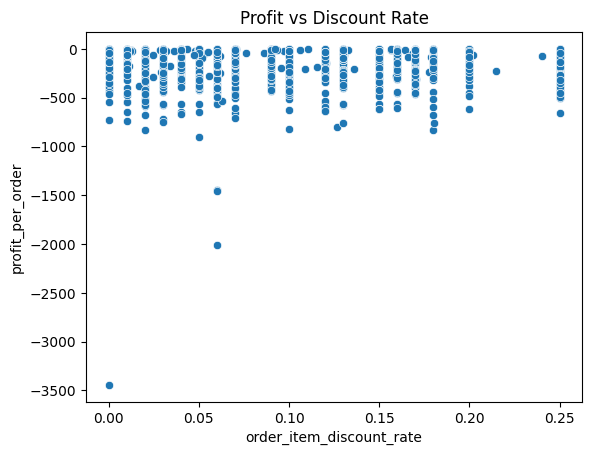

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=negative_profit, x='order_item_discount_rate', y='profit_per_order')
plt.title("Profit vs Discount Rate")
plt.show()


The discount level of the order item does not appear to have a significant effect on the negative profit per order. Profit per order remains negative at various discount levels, indicating that other factors may be more influential on profitability than just the discount level.

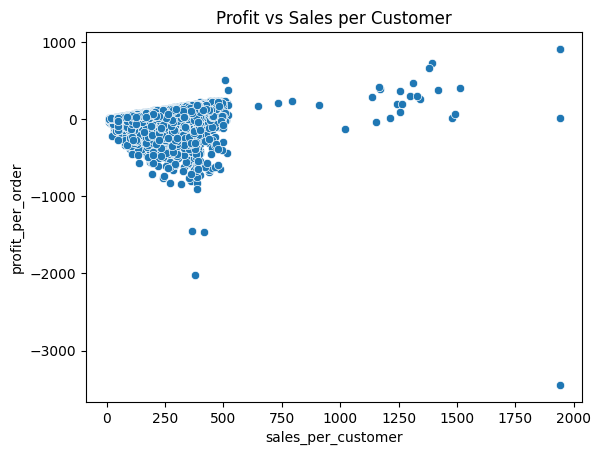

In [16]:
sns.scatterplot(data=df, x='sales_per_customer', y='profit_per_order')
plt.title("Profit vs Sales per Customer")
plt.show()

- Low Sales, Negative Profit: Most of the data points are concentrated around low sales per customer values ​​(between 0 and 500) and negative profit per order (between -1000 and 0). This suggests that low sales per customer are often associated with negative profits. When customers purchase in small quantities, fixed and variable costs may not be covered, leading to negative profits.

- High Sales, Varied Profit: There are also data points that show positive profits at higher sales per customer values. This suggests that as sales per customer increase, there is potential for positive profits. However, there is significant variability, suggesting that not all high sales automatically result in positive profits.

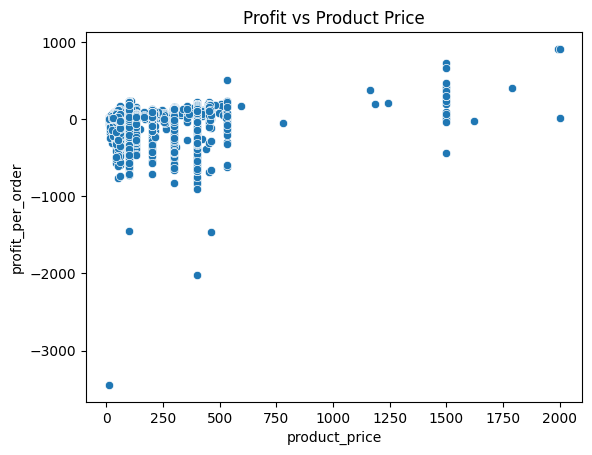

In [17]:
sns.scatterplot(data=df, x='product_price', y='profit_per_order')
plt.title("Profit vs Product Price")
plt.show()


- Low-priced products tend to be more at risk of negative profits, as thin margins may not be enough to cover costs.
- Higher-priced products can generate positive profits, but it’s important to note that not all high-priced products are automatically profitable.

Text(0.5, 1.0, 'sales_per_customer')

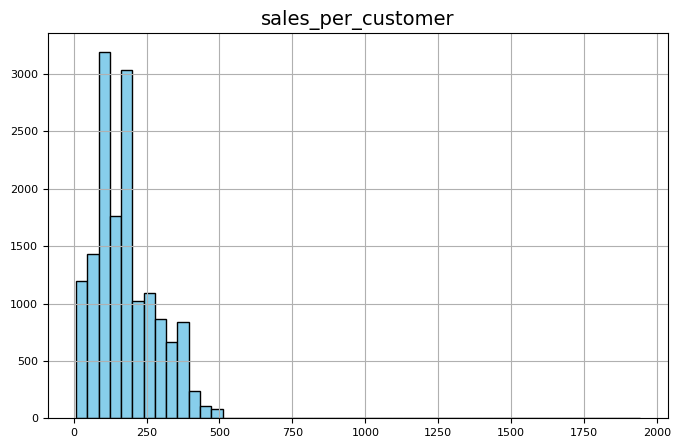

In [18]:
# histplot sales per customer
df['sales_per_customer'].hist(figsize=(8, 5), bins=50, xlabelsize=8, color='skyblue', edgecolor='black', ylabelsize=8)
plt.title('sales_per_customer', fontsize=14)

sales_per_customer (Total sales per customer made per customer)
The distribution is right-skewed, where the majority of customers have low sales, but there are some customers who have very high purchase values.
This insight can be used to identify high-value customers.

Text(0.5, 1.0, 'order_item_profit_ratio')

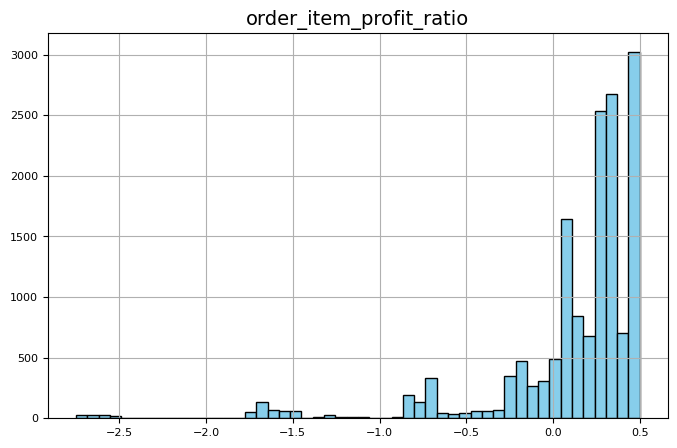

In [19]:
# histplot order item profit ratio
df['order_item_profit_ratio'].hist(figsize=(8, 5), bins=50, color='skyblue', edgecolor='black', xlabelsize=8, ylabelsize=8)
plt.title('order_item_profit_ratio', fontsize=14)

order_item_profit_ratio (Order Item Profit Ratio)
Most of the items have a profit ratio close to zero, but there are outliers on both sides (positive and negative).
Products with negative profit ratios may need to be analyzed to understand the reasons for the losses.

Text(0.5, 1.0, 'order_item_quantity')

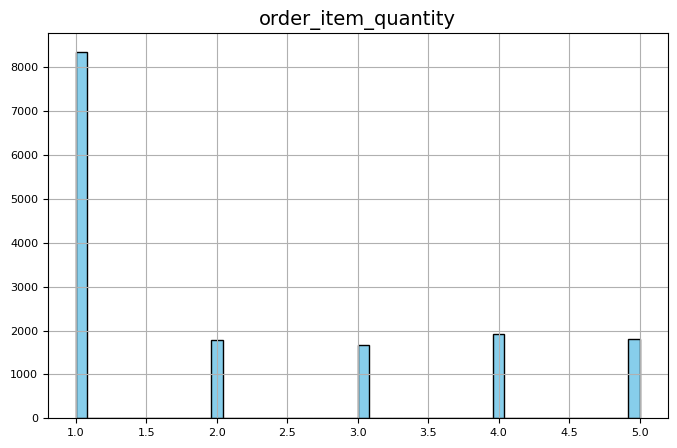

In [20]:
# order item quantity
df['order_item_quantity'].hist(figsize=(8, 5), bins=50, color='skyblue', edgecolor='black', xlabelsize=8, ylabelsize=8)
plt.title('order_item_quantity', fontsize=14)

order_item_quantity(Number of products per order)
Most orders are made in small quantities (1–2 units), which is common in e-commerce or retail.

Text(0.5, 1.0, 'sales')

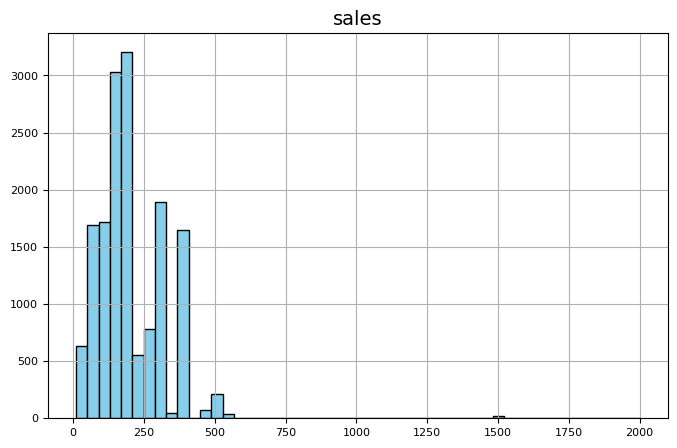

In [21]:
# histplot order item sales
df['sales'].hist(figsize=(8, 5), bins=50, color='skyblue', edgecolor='black', xlabelsize=8, ylabelsize=8)
plt.title('sales', fontsize=14)

sales(Value in sales)
The sales distribution shows that most transactions are low value.
A few transactions are very high value, which can be a focus area for analyzing large transactions.

Text(0.5, 1.0, 'product_price')

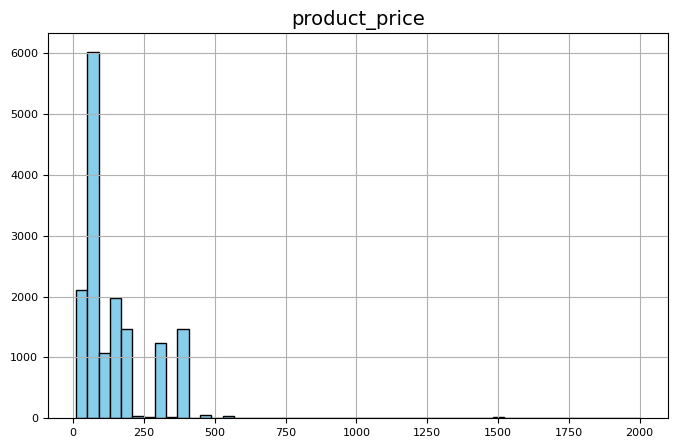

In [22]:
# histplot product price
df['product_price'].hist(figsize=(8, 5), bins=50, color='skyblue', edgecolor='black', xlabelsize=8, ylabelsize=8)
plt.title('product_price', fontsize=14)

product_price(Product price)
The majority of product prices are in the low to medium range, with a few outliers for very expensive products.
This distribution reflects the possibility of premium products among regular products.

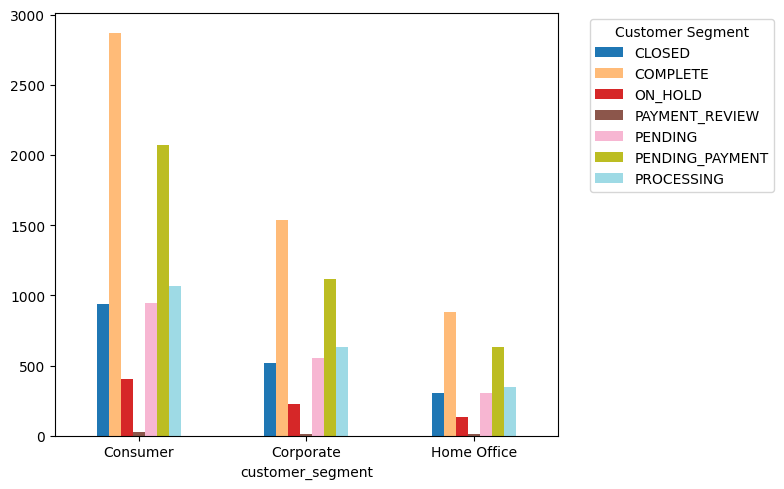

In [23]:
crosstab = pd.crosstab(df['customer_segment'], df['order_status'])
plt.figure(figsize=(8, 5))

ax = crosstab.plot(kind='bar', colormap='tab20', ax=plt.gca())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Most orders in this segment are in “COMPLETE” status, indicating that consumer customers frequently complete transactions.

correlation between profit and order status (encoded): -0.002423778178543368


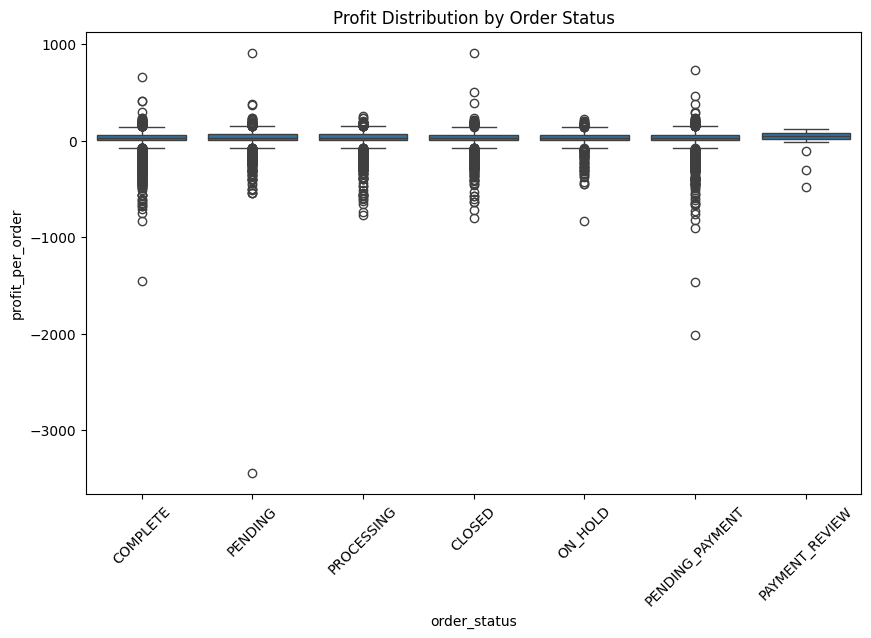

In [24]:
# Make sure the column exists in the dataset
if 'profit_per_order' in df.columns and 'order_status' in df.columns:

    df['order_status_encoded'] = df['order_status'].astype('category').cat.codes

    # corr
    correlation = df['profit_per_order'].corr(df['order_status_encoded'])
    print(f"correlation between profit and order status (encoded): {correlation}")

    # visualize
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='order_status', y='profit_per_order', data=df)
    plt.title('Profit Distribution by Order Status')
    plt.xticks(rotation=45)
    plt.show()

    # Revert order_status to categorical if it was previously changed
    df.drop(columns=['order_status_encoded'], inplace=True)
else:
    print("Kolom 'profit' atau 'order_status' tidak ditemukan dalam dataset.")


order_status does not seem to be a major factor influencing the occurrence of negative (minus) profit. Minus profit occurs in all order_status categories with a similar distribution pattern.

In [25]:
# Add a new column to the DataFrame to mark whether the profit is negative or not.
df['is_negative_profit'] = df['order_item_profit_ratio'] < 0

In [26]:
# crosstab and contigency for negative profit
contingency_table = pd.crosstab(df['label'], df['is_negative_profit'])
print(contingency_table)

is_negative_profit  False  True 
label                           
-1                   2848    697
 0                   2468    560
 1                   7171   1805


In [27]:
profit_negative_ratio = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print(profit_negative_ratio)


is_negative_profit     False     True 
label                                 
-1                  0.803385  0.196615
 0                  0.815059  0.184941
 1                  0.798908  0.201092


In [28]:
# count profit per category
profit_per_category = df.groupby('category_name')['sales'].sum()
profit_per_category.head(10)

,sales
category_name,
Accessories,9589.601465
As Seen on TV!,4341.507996
Baby,4276.504418
Baseball & Softball,8334.355652
Basketball,4835.083580
Books,1037.631825
Boxing & MMA,5522.363930
CDs,306.179935
Cameras,21555.287159


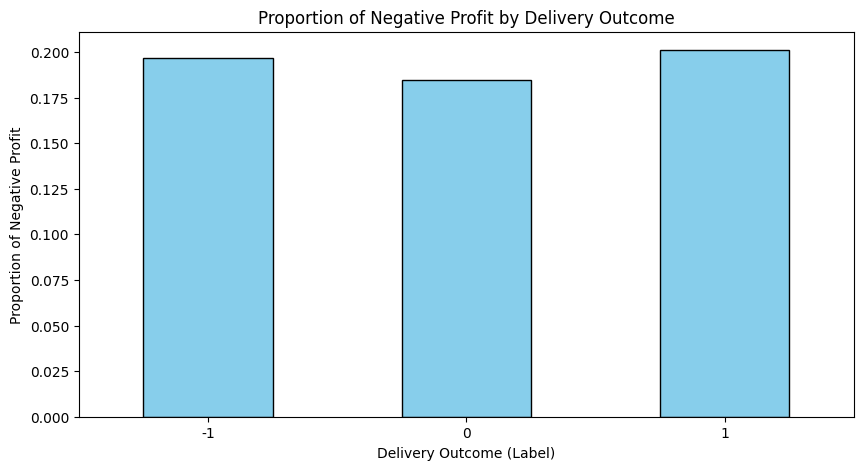

In [29]:
# plotting profit_negative_ratio
profit_negative_ratio[True].plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 5))
plt.title('Proportion of Negative Profit by Delivery Outcome')
plt.xlabel('Delivery Outcome (Label)')
plt.ylabel('Proportion of Negative Profit')
plt.xticks(rotation=0)
plt.show()


In [30]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Statistic: 3.737598303289851
P-Value: 0.1543088521313892


If P-Value < 0.05, then there is a significant relationship between negative profit and delivery status (e.g., more delays are associated with negative profit). If P >= 0.05, then there is no significant relationship.  
there is no significant relationship between negative profit and delivery status based on the given data.

### Profit Conclusion :   
Correlation analysis does not show a significant relationship between profit and variables such as order status, discount rate, sales per customer, product price, or delivery status (label), the common assumption is that the cause of negative profit comes from operational, strategic, or external factors.

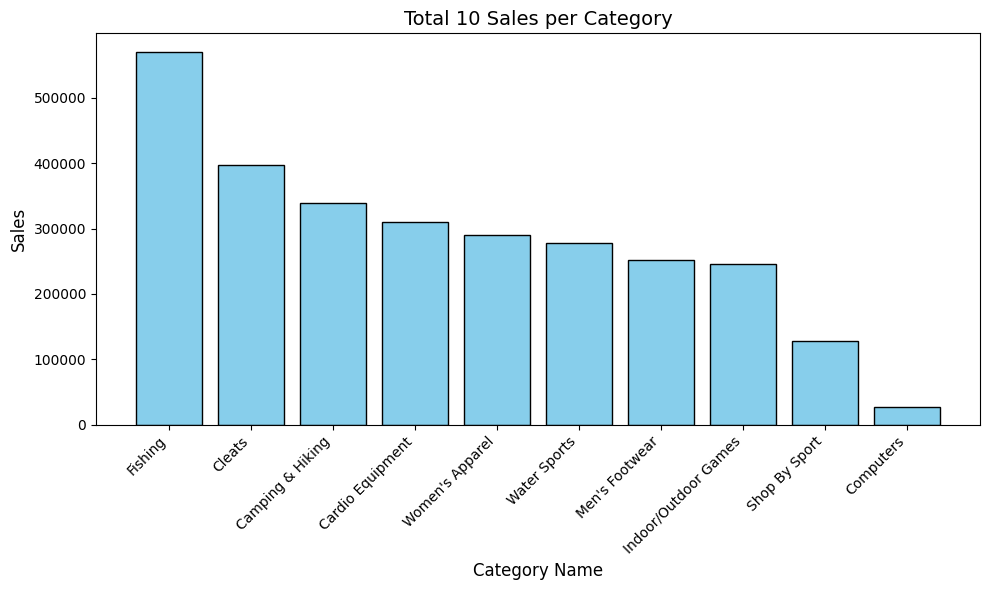

In [31]:
top_10 = profit_per_category.sort_values(ascending=False).head(10) # create top 10 profit /category

# plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10.values, color='skyblue', edgecolor='black')
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Total 10 Sales per Category', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# show plot
plt.show()


In [32]:
sales_per_category = df.groupby('category_name')['sales'].sum().sort_values(ascending=False)
print(sales_per_category)

category_name
Fishing                 570423.540000
Cleats                  397759.764404
Camping & Hiking        338823.815750
Cardio Equipment        310083.493316
Women's Apparel         290962.966714
Water Sports            278565.762750
Men's Footwear          251893.960672
Indoor/Outdoor Games    246486.888565
Shop By Sport           127637.085745
Computers                27452.581353
Electronics              26720.508021
Cameras                  21555.287159
Children's Clothing      21097.516560
Garden                   18301.842500
Music                    14992.541727
Crafts                   13722.720716
Golf Shoes               12062.579740
Women's Clothing         11162.855835
Golf Balls               10791.422583
Golf Gloves               9886.819946
Accessories               9589.601465
Baseball & Softball       8334.355652
Girls' Apparel            7844.327030
Health and Beauty         6283.351030
Consumer Electronics      6160.504890
Tennis & Racquet          5772.17384

In [33]:
sales_per_region = df.groupby('order_region')['sales'].sum()
print(sales_per_region)


order_region
Canada              16084.639040
Caribbean          132252.899893
Central Africa      23469.511394
Central America    490768.842589
Central Asia         1911.859935
East Africa         42717.768739
East of USA        120824.447733
Eastern Asia       134655.422836
Eastern Europe      53660.413079
North Africa        42855.627951
Northern Europe    195403.085012
Oceania            176987.530393
South America      242133.711873
South Asia         110990.147957
South of  USA       65179.627551
Southeast Asia     164765.668993
Southern Africa     10428.158160
Southern Europe    182531.976385
US Center           95164.141001
West Africa         59476.483607
West Asia          112515.815763
West of USA        120837.551571
Western Europe     522927.700090
Name: sales, dtype: float64


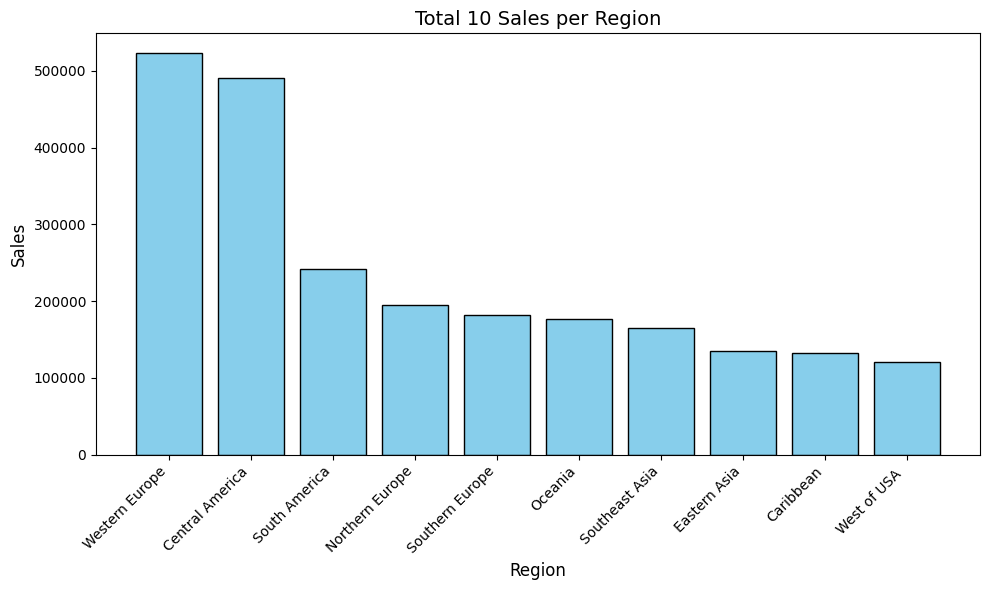

In [34]:
top_10 = sales_per_region.sort_values(ascending=False).head(10) # create top 10 sales per region

# plotting
plt.figure(figsize=(10, 6))
plt.bar(top_10.index, top_10.values,color='skyblue', edgecolor='black')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Total 10 Sales per Region', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## Deliveries Analysis

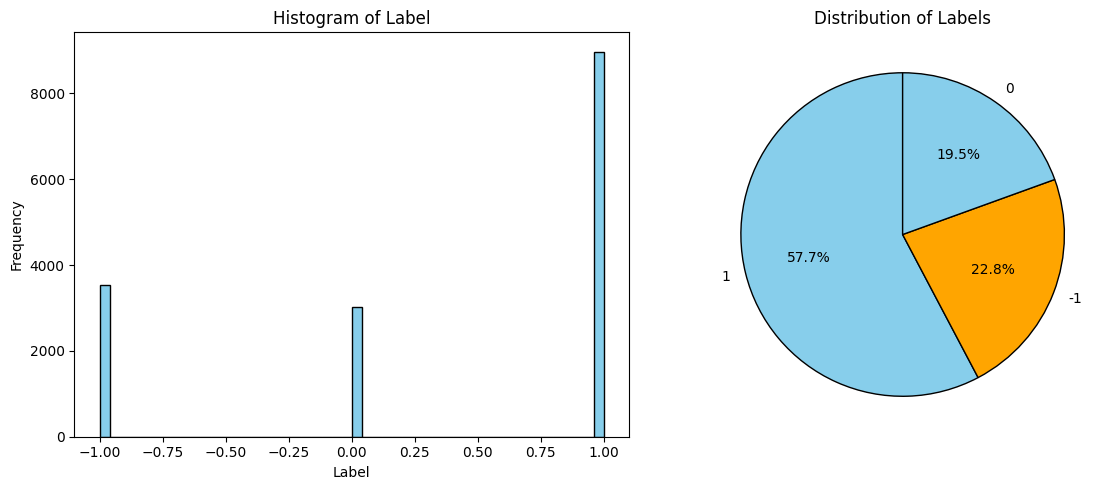

In [35]:
# counting every class in 'label'
label_count = df['label'].value_counts()

# plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 baris, 2 kolom

# histogram
ax1.hist(df['label'], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Histogram of Label')
ax1.set_xlabel('Label')
ax1.set_ylabel('Frequency')

# pie chart
ax2.pie(label_count, labels=label_count.index, autopct="%1.1f%%", colors=["skyblue", "orange"], startangle=90, wedgeprops={'edgecolor': 'black'})
ax2.set_title('Distribution of Labels')

plt.tight_layout()
plt.show()


In [36]:
df['label'].value_counts()

,count
label,
1,8976
-1,3545
0,3028


<ipython-input-37-cc71bb20eb9d>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(data=df, x='shipping_mode', hue='label',  color='skyblue', edgecolor='black')


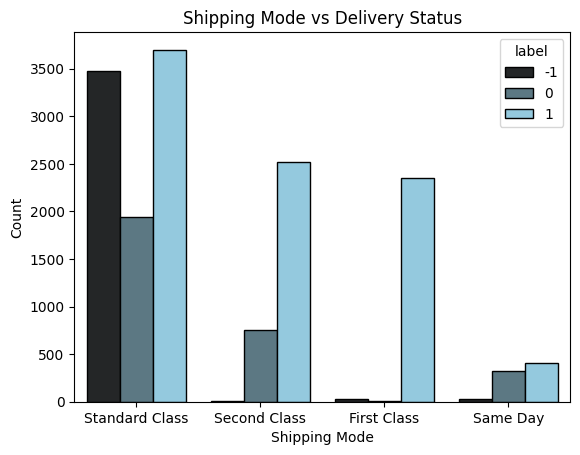

In [37]:
# barplot shipping mode vs delay status
sns.countplot(data=df, x='shipping_mode', hue='label',  color='skyblue', edgecolor='black')
plt.title('Shipping Mode vs Delivery Status')
plt.ylabel('Count')
plt.xlabel('Shipping Mode')
plt.show()

The analysis shows that although shipping with "Standard Class" has a higher delay rate, it is more preferred compared to other shipping methods. This also applies to other shipping classes, all of which have higher delay rates compared to on-time deliveries.

In [38]:
df['shipping_mode'].value_counts()

,count
shipping_mode,
Standard Class,9116
Second Class,3283
First Class,2391
Same Day,759


In [39]:
from scipy.stats import chi2_contingency
# contingency table
contingency_table = pd.crosstab(df['shipping_mode'], df['label'])

# Chi-Square
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between shipping_mode and delay_status")
else:
    print("There is no significant relationship between shipping_mode and delay_status.")

Chi-Square Statistic: 4325.831405541143
P-Value: 0.0
There is a significant relationship between shipping_mode and delay_status


In [40]:
# create new column for order_location
df['order_location'] = df['order_city'] + ", " + df['order_country']

In [41]:
# Aggregate data by location and shipping mode
location_analysis = df.groupby(['order_location', 'shipping_mode'])['label'].value_counts(normalize=True).unstack()

In [42]:
# The location with the highest number of deliveries
top_locations = df['order_location'].value_counts().head(10).index
filtered_data = df[df['order_location'].isin(top_locations)]

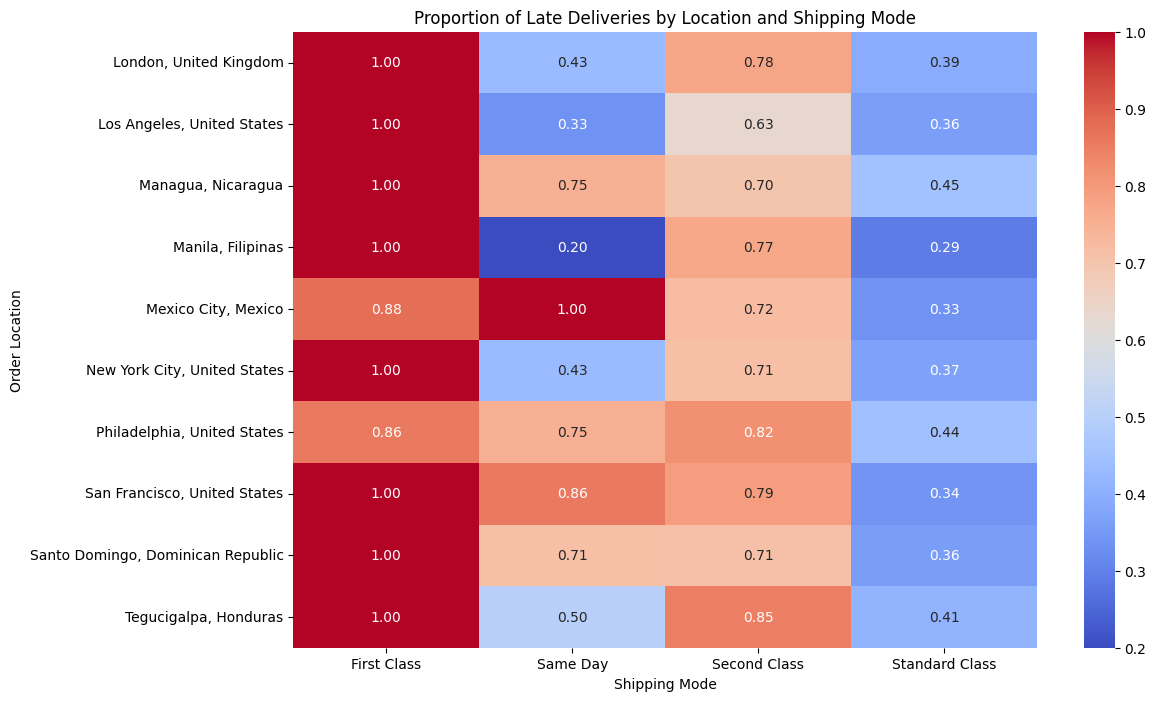

In [43]:
# Pivot data for heatmap (top location)
heatmap_data = filtered_data.pivot_table(
    index='order_location',
    columns='shipping_mode',
    values='label',
    aggfunc=lambda x: (x == 1).mean()  # Proporsi keterlambatan (label = 1)
    )
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Proportion of Late Deliveries by Location and Shipping Mode')
plt.ylabel('Order Location')
plt.xlabel('Shipping Mode')
plt.show()


first-class shipments tend to have a very high proportion of delays across all locations, while same-day deliveries show considerable variation between locations. Second-class and standard shipments are also often delayed but with less variation.

# Feature Engineering

In [44]:
# change class -1 to 0 to make classification easier
df['label'] = df['label'].replace(-1, 0)
df['label'].value_counts()

,count
label,
1,8976
0,6573


In [45]:
print(df['label'].unique())

[0 1]


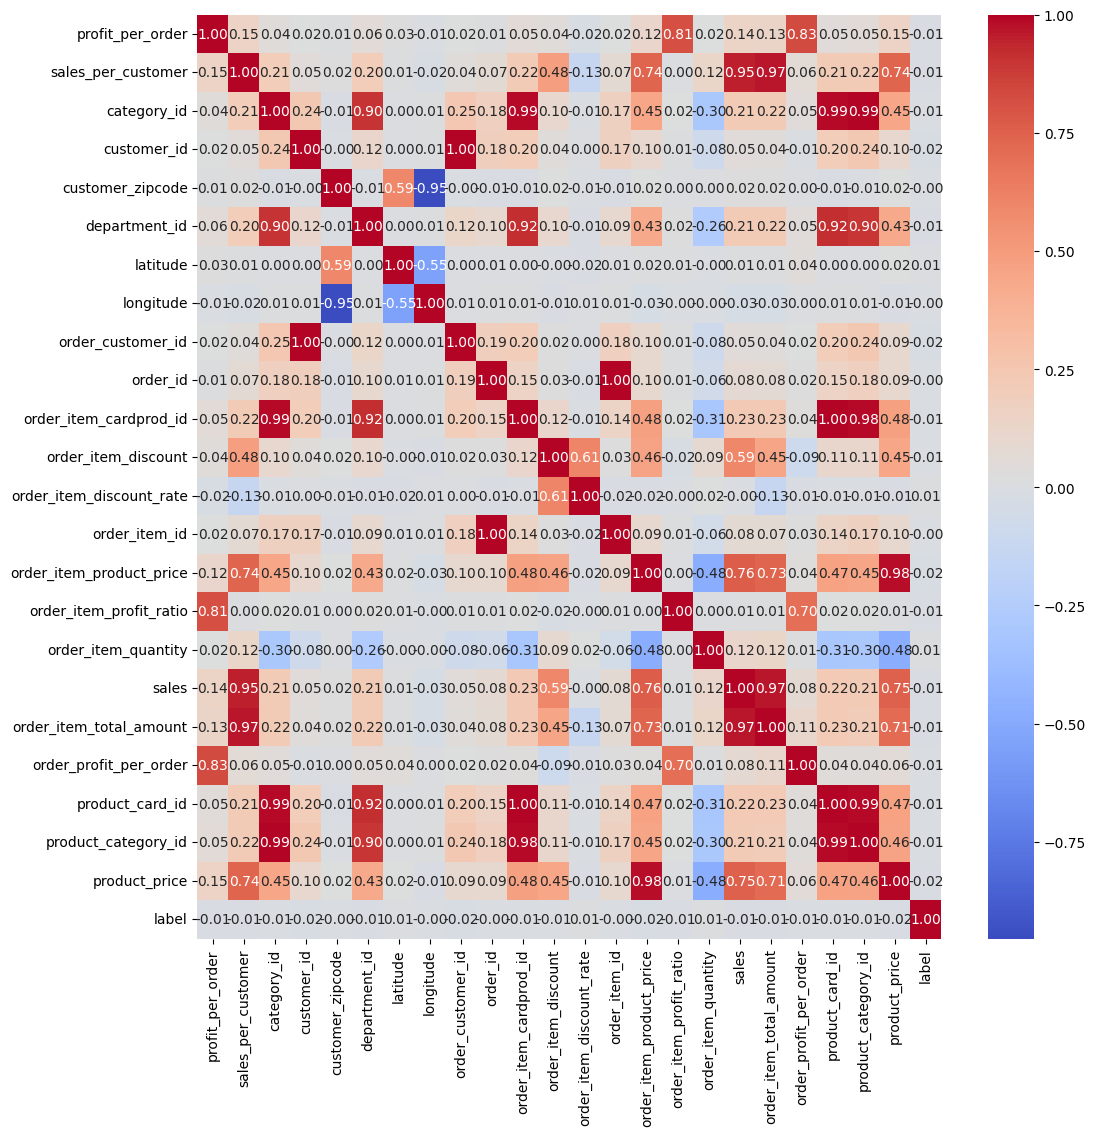

In [46]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# plotting
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [47]:
# use numeric columns
X = df.select_dtypes(include=[np.number])

# choose target
target = 'label'  # Ganti dengan nama kolom target

# count correlation feature with target
corr_with_target = X.corr()[target].sort_values(ascending=True)

print(corr_with_target)

customer_id                -0.017371
order_item_product_price   -0.016727
order_customer_id          -0.015534
product_price              -0.015318
sales_per_customer         -0.011738
order_item_profit_ratio    -0.011156
order_item_total_amount    -0.010763
sales                      -0.010302
department_id              -0.010261
profit_per_order           -0.007923
product_category_id        -0.007658
product_card_id            -0.007631
order_item_cardprod_id     -0.007365
order_profit_per_order     -0.006611
order_item_discount        -0.006571
category_id                -0.006002
order_item_id              -0.003802
order_id                   -0.003683
longitude                  -0.002035
customer_zipcode           -0.000789
latitude                    0.005946
order_item_discount_rate    0.009092
order_item_quantity         0.009719
label                       1.000000
Name: label, dtype: float64


In [48]:
nums = df.select_dtypes(include=['int64', 'float64'])
nums.columns

Index(['profit_per_order', 'sales_per_customer', 'category_id', 'customer_id',
       'customer_zipcode', 'department_id', 'latitude', 'longitude',
       'order_customer_id', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total_amount',
       'order_profit_per_order', 'product_card_id', 'product_category_id',
       'product_price', 'label'],
      dtype='object')

In [49]:
# select numeric columns
X = df.select_dtypes(include=[np.number])

# calculate vif score
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['vif_score'] = [vif(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,vif_score
0,profit_per_order,7.941830
1,sales_per_customer,105.119756
2,category_id,923.984150
3,customer_id,1014.867988
4,customer_zipcode,8.136208
5,department_id,79.761443
6,latitude,14.409546
7,longitude,62.019625
8,order_customer_id,1026.386844
9,order_id,3058.698034


In [50]:
df = df.drop(columns=['order_id', 'order_customer_id', 'product_card_id', 'category_id', 'order_item_cardprod_id', 'order_item_total_amount',
                      'order_item_product_price', 'sales', 'product_price', 'product_category_id', 'profit_per_order'])

In [51]:
# makesure label is int
df['label'] = df['label'].astype(int)

# mapping
df['label'] = df['label'].map({0: 'On Time', 1: 'Late'})
df[['label']].head()

,label
0,On Time
1,On Time
2,Late
3,On Time
4,Late


we going to use chi-square, so we need to transform target (label) to categorical first

In [52]:
# select categorical columns
cats = df.select_dtypes(include=['object','category'])
cats.columns

Index(['payment_type', 'category_name', 'customer_city', 'customer_country',
       'customer_segment', 'customer_state', 'department_name', 'market',
       'order_city', 'order_country', 'order_date', 'order_region',
       'order_state', 'order_status', 'product_name', 'shipping_date',
       'shipping_mode', 'label', 'order_location'],
      dtype='object')

In [53]:
#Chi-square test of independence

from scipy.stats import chi2_contingency

independent_cols = []

for col in cats.columns:
    observed_frequency = pd.crosstab(cats[col],cats['label'])
    chi = chi2_contingency(observed_frequency)
    if chi.pvalue < 0.1:
        print(f"{col} is dependent , its pvalue is {chi.pvalue}")
    else:
        print(f"{col} is independent , its pvalue is {chi.pvalue}")
        independent_cols.append(col)
    print()

print(independent_cols)

payment_type is independent , its pvalue is 0.19625607767140027

category_name is dependent , its pvalue is 0.06414568795291138

customer_city is independent , its pvalue is 0.687524855089058

customer_country is independent , its pvalue is 0.684905581731458

customer_segment is independent , its pvalue is 0.5555673165275227

customer_state is independent , its pvalue is 0.5200837344091873

department_name is independent , its pvalue is 0.7443620136500335

market is independent , its pvalue is 0.6529877954729841

order_city is independent , its pvalue is 0.806883270361247

order_country is independent , its pvalue is 0.7799611801033423

order_date is independent , its pvalue is 0.8879174839434248

order_region is independent , its pvalue is 0.715755273227829

order_state is independent , its pvalue is 0.950538278397031

order_status is independent , its pvalue is 0.31314061181035124

product_name is dependent , its pvalue is 0.06789572058260106

shipping_date is independent , its pvalu

Independent columns may be considered for removal from the analysis or model if they do not contribute significantly to the target prediction. we area going to exclude order_date, and shipping_date columns

In [54]:
cols_to_drop = [col for col in independent_cols if col not in ['order_date', 'shipping_date', 'order_state', 'order_city']]
df = df.drop(cols_to_drop, axis='columns')
df.head()

,sales_per_customer,category_name,customer_id,customer_zipcode,department_id,latitude,longitude,order_city,order_date,order_item_discount,order_item_discount_rate,order_item_id,order_item_profit_ratio,order_item_quantity,order_profit_per_order,order_state,product_name,shipping_date,shipping_mode,label,is_negative_profit
0,92.49099,Cardio Equipment,12097.6830,725.0000,3.0,18.359064,-66.370575,Viena,2015-08-12 00:00:00+01:00,12.623338,0.13,38030.996,0.41,1.0,32.083145,Vienna,Nike Men's Free 5.0+ Running Shoe,2015-08-13 00:00:00+01:00,Standard Class,On Time,False
1,181.99008,Water Sports,5108.1045,92745.1600,7.0,37.636528,-121.119630,Buenos Aires,2017-02-10 00:00:00+00:00,16.500000,0.07,142621.780,0.48,1.0,91.235870,Buenos Aires,Pelican Sunstream 100 Kayak,2017-04-09 00:00:00+01:00,Standard Class,On Time,False
2,89.96643,Indoor/Outdoor Games,4293.4478,2457.7297,7.0,18.294100,-66.037056,Burnie,2015-01-01 00:00:00+00:00,6.600000,0.06,18723.178,0.09,2.0,6.965549,Nord-Pas-de-Calais-Picardy,O'Brien Men's Neoprene Life Vest,2015-03-18 00:00:00+00:00,Second Class,Late,False
3,99.15065,Cleats,546.5306,725.0000,4.0,18.202435,-66.370510,Santa Ana,2017-05-31 00:00:00+01:00,16.942171,0.16,141654.580,-0.80,2.0,-95.401400,Santa Ana,Perfect Fitness Perfect Rip Deck,2017-03-18 00:00:00+00:00,Second Class,On Time,True
4,170.97824,Water Sports,1546.3980,95118.6000,7.0,38.719500,-122.319720,Blumenau,2015-03-28 00:00:00+00:00,29.990000,0.15,14204.896,0.27,1.0,44.569000,Illinois,Pelican Sunstream 100 Kayak,2015-03-30 00:00:00+01:00,Standard Class,Late,False


In [55]:
df = df.drop(columns=['product_name', 'is_negative_profit', 'category_name'])

In [56]:
# select categorical columns
cats = df.select_dtypes(include=['object','category'])

# mapping for every columns
mappings = {col: {val: i for i, val in enumerate(cats[col].unique())} for col in cats}

# show result
for col, mapping in mappings.items():
  print (f"columns '{col}': {mapping}")

columns 'order_city': {'Viena': 0, 'Buenos Aires': 1, 'Burnie': 2, 'Santa Ana': 3, 'Blumenau': 4, 'Philadelphia': 5, 'Los Angeles': 6, 'Bangkok': 7, 'Villahermosa': 8, 'Mobile': 9, 'Cucuta': 10, 'Cape Town': 11, 'Livry-Gargan': 12, 'New York City': 13, 'Vitoria': 14, 'Madrid': 15, 'Blackpool': 16, 'Melbourne': 17, 'Bottrop': 18, 'Pontevedra': 19, 'Logan': 20, 'Rangoon': 21, 'Giurgiu': 22, 'Auburn': 23, 'Daca': 24, 'Maidenhead': 25, 'Fairfield': 26, 'Lahore': 27, 'Linyi': 28, 'Sydney': 29, 'San Miguelito': 30, 'Oviedo': 31, 'Haifa': 32, 'Johannesburg': 33, 'Surabaya': 34, 'Kathmandu': 35, 'Nogent-sur-Oise': 36, 'Yakarta': 37, 'Turin': 38, 'Yalova': 39, 'Cabimas': 40, 'Port Moresby': 41, 'La Romana': 42, 'San Francisco': 43, 'Masaya': 44, 'Henderson': 45, 'Kuala Terengganu': 46, 'Tegucigalpa': 47, 'Carrara': 48, 'Edinburg': 49, 'Emden': 50, 'Colmar': 51, 'Panama City': 52, 'London': 53, 'Manila': 54, 'Bari': 55, 'Caloocan': 56, 'Mixco': 57, 'Bunbury': 58, 'Houston': 59, 'Reims': 60, 'Har

In [57]:
df['order_date'] = pd.to_datetime(df['order_date'], utc=True, errors='coerce')
df['shipping_date'] = pd.to_datetime(df['shipping_date'], utc=True, errors='coerce')

In [58]:
df['delivery_days'] = (df['shipping_date'] - df['order_date']).dt.days.astype(int)

In [59]:
df.head()

,sales_per_customer,customer_id,customer_zipcode,department_id,latitude,longitude,order_city,order_date,order_item_discount,order_item_discount_rate,order_item_id,order_item_profit_ratio,order_item_quantity,order_profit_per_order,order_state,shipping_date,shipping_mode,label,delivery_days
0,92.49099,12097.6830,725.0000,3.0,18.359064,-66.370575,Viena,2015-08-11 23:00:00+00:00,12.623338,0.13,38030.996,0.41,1.0,32.083145,Vienna,2015-08-12 23:00:00+00:00,Standard Class,On Time,1
1,181.99008,5108.1045,92745.1600,7.0,37.636528,-121.119630,Buenos Aires,2017-02-10 00:00:00+00:00,16.500000,0.07,142621.780,0.48,1.0,91.235870,Buenos Aires,2017-04-08 23:00:00+00:00,Standard Class,On Time,57
2,89.96643,4293.4478,2457.7297,7.0,18.294100,-66.037056,Burnie,2015-01-01 00:00:00+00:00,6.600000,0.06,18723.178,0.09,2.0,6.965549,Nord-Pas-de-Calais-Picardy,2015-03-18 00:00:00+00:00,Second Class,Late,76
3,99.15065,546.5306,725.0000,4.0,18.202435,-66.370510,Santa Ana,2017-05-30 23:00:00+00:00,16.942171,0.16,141654.580,-0.80,2.0,-95.401400,Santa Ana,2017-03-18 00:00:00+00:00,Second Class,On Time,-74
4,170.97824,1546.3980,95118.6000,7.0,38.719500,-122.319720,Blumenau,2015-03-28 00:00:00+00:00,29.990000,0.15,14204.896,0.27,1.0,44.569000,Illinois,2015-03-29 23:00:00+00:00,Standard Class,Late,1


we have negative values in delivery_days, which doesn't make sense, therefore we will change that negative values.

In [60]:
df['delivery_days'] = df['delivery_days'].apply(lambda x: max(x,1))

In [61]:
q25 = df['delivery_days'].quantile(0.25)
q75 = df['delivery_days'].quantile(0.75)
estimated_delivery_days = (q25 + q75) / 2

In [62]:
# groupby location
estimated_delivery_perlocation = df.groupby('shipping_mode')['delivery_days'].median().to_dict()
df['estimated_delivery_days'] = df['shipping_mode'].map(estimated_delivery_perlocation)

In [63]:
df

,sales_per_customer,customer_id,customer_zipcode,department_id,latitude,longitude,order_city,order_date,order_item_discount,order_item_discount_rate,order_item_id,order_item_profit_ratio,order_item_quantity,order_profit_per_order,order_state,shipping_date,shipping_mode,label,delivery_days,estimated_delivery_days
0,92.490990,12097.6830,725.0000,3.0,18.359064,-66.370575,Viena,2015-08-11 23:00:00+00:00,12.623338,0.13,38030.996,0.410000,1.0,32.083145,Vienna,2015-08-12 23:00:00+00:00,Standard Class,On Time,1,14.0
1,181.990080,5108.1045,92745.1600,7.0,37.636528,-121.119630,Buenos Aires,2017-02-10 00:00:00+00:00,16.500000,0.07,142621.780,0.480000,1.0,91.235870,Buenos Aires,2017-04-08 23:00:00+00:00,Standard Class,On Time,57,14.0
2,89.966430,4293.4478,2457.7297,7.0,18.294100,-66.037056,Burnie,2015-01-01 00:00:00+00:00,6.600000,0.06,18723.178,0.090000,2.0,6.965549,Nord-Pas-de-Calais-Picardy,2015-03-18 00:00:00+00:00,Second Class,Late,76,14.0
3,99.150650,546.5306,725.0000,4.0,18.202435,-66.370510,Santa Ana,2017-05-30 23:00:00+00:00,16.942171,0.16,141654.580,-0.800000,2.0,-95.401400,Santa Ana,2017-03-18 00:00:00+00:00,Second Class,On Time,1,14.0
4,170.978240,1546.3980,95118.6000,7.0,38.719500,-122.319720,Blumenau,2015-03-28 00:00:00+00:00,29.990000,0.15,14204.896,0.270000,1.0,44.569000,Illinois,2015-03-29 23:00:00+00:00,Standard Class,Late,1,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15544,359.980000,8333.1170,725.0000,7.0,18.252699,-66.370610,Managua,2017-04-02 23:00:00+00:00,36.454994,0.09,143521.440,0.286839,1.0,102.063774,Managua,2017-04-02 23:00:00+00:00,Standard Class,Late,1,14.0
15545,169.990000,3182.7766,725.0000,7.0,18.212540,-66.370544,Guadalajara,2017-03-06 00:00:00+00:00,22.100000,0.13,141766.400,0.114995,4.0,25.072104,Yucatan,2017-06-04 23:00:00+00:00,Standard Class,On Time,90,14.0
15546,47.497177,9697.5720,77506.5400,6.0,29.839552,-98.503020,Odense,2015-05-31 23:00:00+00:00,5.000000,0.09,22087.852,0.310000,2.0,12.163874,North Rhine-Westphalia,2015-05-03 23:00:00+00:00,Standard Class,On Time,1,14.0
15547,49.973537,1953.6525,725.0000,4.0,18.229500,-66.370510,Bandung,2016-01-31 00:00:00+00:00,9.100000,0.16,73274.234,-0.323644,1.0,-17.863270,West Java,2016-04-06 23:00:00+00:00,Standard Class,Late,66,14.0


In [64]:
# convert back to int
df['label'] = df['label'].map({'On Time': 0, 'Late': 1})

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   sales_per_customer        15549 non-null  float64            
 1   customer_id               15549 non-null  float64            
 2   customer_zipcode          15549 non-null  float64            
 3   department_id             15549 non-null  float64            
 4   latitude                  15549 non-null  float64            
 5   longitude                 15549 non-null  float64            
 6   order_city                15549 non-null  object             
 7   order_date                15549 non-null  datetime64[ns, UTC]
 8   order_item_discount       15549 non-null  float64            
 9   order_item_discount_rate  15549 non-null  float64            
 10  order_item_id             15549 non-null  float64            
 11  order_item_prof

In [66]:
# select categorical columns
cats = df.select_dtypes(include=['object','category'])

# mapping for every columns
mappings = {col: {val: i for i, val in enumerate(cats[col].unique())} for col in cats}

# show result
for col, mapping in mappings.items():
  print (f"columns '{col}': {mapping}")

columns 'order_city': {'Viena': 0, 'Buenos Aires': 1, 'Burnie': 2, 'Santa Ana': 3, 'Blumenau': 4, 'Philadelphia': 5, 'Los Angeles': 6, 'Bangkok': 7, 'Villahermosa': 8, 'Mobile': 9, 'Cucuta': 10, 'Cape Town': 11, 'Livry-Gargan': 12, 'New York City': 13, 'Vitoria': 14, 'Madrid': 15, 'Blackpool': 16, 'Melbourne': 17, 'Bottrop': 18, 'Pontevedra': 19, 'Logan': 20, 'Rangoon': 21, 'Giurgiu': 22, 'Auburn': 23, 'Daca': 24, 'Maidenhead': 25, 'Fairfield': 26, 'Lahore': 27, 'Linyi': 28, 'Sydney': 29, 'San Miguelito': 30, 'Oviedo': 31, 'Haifa': 32, 'Johannesburg': 33, 'Surabaya': 34, 'Kathmandu': 35, 'Nogent-sur-Oise': 36, 'Yakarta': 37, 'Turin': 38, 'Yalova': 39, 'Cabimas': 40, 'Port Moresby': 41, 'La Romana': 42, 'San Francisco': 43, 'Masaya': 44, 'Henderson': 45, 'Kuala Terengganu': 46, 'Tegucigalpa': 47, 'Carrara': 48, 'Edinburg': 49, 'Emden': 50, 'Colmar': 51, 'Panama City': 52, 'London': 53, 'Manila': 54, 'Bari': 55, 'Caloocan': 56, 'Mixco': 57, 'Bunbury': 58, 'Houston': 59, 'Reims': 60, 'Har

In [67]:
# lable encoder
# identify object columns
cats = df.select_dtypes(include=['object']).columns

# convert to numeric
df[cats] = df[cats].apply(lambda col: col.astype('category').cat.codes)
df.head()

,sales_per_customer,customer_id,customer_zipcode,department_id,latitude,longitude,order_city,order_date,order_item_discount,order_item_discount_rate,order_item_id,order_item_profit_ratio,order_item_quantity,order_profit_per_order,order_state,shipping_date,shipping_mode,label,delivery_days,estimated_delivery_days
0,92.49099,12097.6830,725.0000,3.0,18.359064,-66.370575,2550,2015-08-11 23:00:00+00:00,12.623338,0.13,38030.996,0.41,1.0,32.083145,930,2015-08-12 23:00:00+00:00,3,0,1,14.0
1,181.99008,5108.1045,92745.1600,7.0,37.636528,-121.119630,386,2017-02-10 00:00:00+00:00,16.500000,0.07,142621.780,0.48,1.0,91.235870,148,2017-04-08 23:00:00+00:00,3,0,57,14.0
2,89.96643,4293.4478,2457.7297,7.0,18.294100,-66.037056,399,2015-01-01 00:00:00+00:00,6.600000,0.06,18723.178,0.09,2.0,6.965549,645,2015-03-18 00:00:00+00:00,2,1,76,14.0
3,99.15065,546.5306,725.0000,4.0,18.202435,-66.370510,2180,2017-05-30 23:00:00+00:00,16.942171,0.16,141654.580,-0.80,2.0,-95.401400,780,2017-03-18 00:00:00+00:00,2,0,1,14.0
4,170.97824,1546.3980,95118.6000,7.0,38.719500,-122.319720,315,2015-03-28 00:00:00+00:00,29.990000,0.15,14204.896,0.27,1.0,44.569000,397,2015-03-29 23:00:00+00:00,3,1,1,14.0


In [68]:
df = df.drop(columns=['order_date', 'shipping_date', 'customer_id',
                      'order_item_discount','order_item_discount_rate','order_item_profit_ratio','sales_per_customer','order_profit_per_order'])

In [69]:
df.head()

,customer_zipcode,department_id,latitude,longitude,order_city,order_item_id,order_item_quantity,order_state,shipping_mode,label,delivery_days,estimated_delivery_days
0,725.0000,3.0,18.359064,-66.370575,2550,38030.996,1.0,930,3,0,1,14.0
1,92745.1600,7.0,37.636528,-121.119630,386,142621.780,1.0,148,3,0,57,14.0
2,2457.7297,7.0,18.294100,-66.037056,399,18723.178,2.0,645,2,1,76,14.0
3,725.0000,4.0,18.202435,-66.370510,2180,141654.580,2.0,780,2,0,1,14.0
4,95118.6000,7.0,38.719500,-122.319720,315,14204.896,1.0,397,3,1,1,14.0


## Split, Train, & Validation

In [70]:
# split data to feature and target
X = df.drop(columns=["label"])
y = df["label"]

# split train and test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# split the temporary set into a validation set (20%) and a test set (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## SMOTE

In [71]:
# using SMOTE for imbalance target class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution before SMOTE:
label
1    5385
0    3944
Name: count, dtype: int64

Class distribution after SMOTE:
label
1    5385
0    5385
Name: count, dtype: int64


# Cross-Validation

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Definisikan model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Cross-Validation
cv_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

# finding best model based on average accuracy
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
print(f"\nBest Model: {best_model_name}")


Logistic Regression Cross-Validation Accuracy: 0.5026 (+/- 0.0095)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.7071 (+/- 0.0488)
Decision Tree Cross-Validation Accuracy: 0.6539 (+/- 0.0375)
Naive Bayes Cross-Validation Accuracy: 0.6479 (+/- 0.0107)
SVM Cross-Validation Accuracy: 0.4949 (+/- 0.0115)
Random Forest Cross-Validation Accuracy: 0.7188 (+/- 0.0302)

Best Model: Random Forest


# Modelling

In [81]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_smote, y_train_smote)  # Fit model

# Predict on validation data and test data
y_val_pred_logreg = logreg.predict(X_val)
y_test_pred_logreg = logreg.predict(X_test)

# Display classification report for validation data
print("\nLogistic Regression - Validation Data:")
print(classification_report(y_val, y_val_pred_logreg))

# Display classification report for test data
print("\nLogistic Regression - Test Data:")
print(classification_report(y_test, y_test_pred_logreg))


Logistic Regression - Validation Data:
              precision    recall  f1-score   support

           0       0.58      0.83      0.68      1314
           1       0.82      0.56      0.66      1796

    accuracy                           0.67      3110
   macro avg       0.70      0.69      0.67      3110
weighted avg       0.72      0.67      0.67      3110


Logistic Regression - Test Data:
              precision    recall  f1-score   support

           0       0.57      0.83      0.68      1315
           1       0.81      0.54      0.65      1795

    accuracy                           0.66      3110
   macro avg       0.69      0.69      0.66      3110
weighted avg       0.71      0.66      0.66      3110



In [74]:
# XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_xgb = xgb_clf.predict(X_val)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Classification report
print("XGBoost - Validation Data:")
print(classification_report(y_val, y_val_pred_xgb))

print("\nXGBoost - Test Data:")
print(classification_report(y_test, y_test_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:29:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Validation Data:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64      1314
           1       0.74      0.68      0.71      1796

    accuracy                           0.68      3110
   macro avg       0.67      0.68      0.67      3110
weighted avg       0.68      0.68      0.68      3110


XGBoost - Test Data:
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1315
           1       0.75      0.68      0.72      1795

    accuracy                           0.69      3110
   macro avg       0.68      0.69      0.68      3110
weighted avg       0.69      0.69      0.69      3110



In [75]:
# Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_dtc = dtc.predict(X_val)
y_test_pred_dtc = dtc.predict(X_test)

# Classification report
print("Decision Tree - Validation Data:")
print(classification_report(y_val, y_val_pred_dtc))

print("\nDecision Tree - Test Data:")
print(classification_report(y_test, y_test_pred_dtc))


Decision Tree - Validation Data:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1314
           1       0.69      0.67      0.68      1796

    accuracy                           0.63      3110
   macro avg       0.62      0.63      0.62      3110
weighted avg       0.63      0.63      0.63      3110


Decision Tree - Test Data:
              precision    recall  f1-score   support

           0       0.57      0.60      0.58      1315
           1       0.69      0.67      0.68      1795

    accuracy                           0.64      3110
   macro avg       0.63      0.63      0.63      3110
weighted avg       0.64      0.64      0.64      3110



In [76]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_nb = nb.predict(X_val)
y_test_pred_nb = nb.predict(X_test)

# Classification report
print("Naive Bayes - Validation Data:")
print(classification_report(y_val, y_val_pred_nb))

print("\nNaive Bayes - Test Data:")
print(classification_report(y_test, y_test_pred_nb))


Naive Bayes - Validation Data:
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      1314
           1       0.81      0.46      0.59      1796

    accuracy                           0.63      3110
   macro avg       0.68      0.66      0.62      3110
weighted avg       0.70      0.63      0.62      3110


Naive Bayes - Test Data:
              precision    recall  f1-score   support

           0       0.54      0.86      0.66      1315
           1       0.82      0.45      0.58      1795

    accuracy                           0.63      3110
   macro avg       0.68      0.66      0.62      3110
weighted avg       0.70      0.63      0.62      3110



In [77]:
# SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_svm = svm.predict(X_val)
y_test_pred_svm = svm.predict(X_test)

# Classification report
print("SVM - Validation Data:")
print(classification_report(y_val, y_val_pred_svm))

print("\nSVM - Test Data:")
print(classification_report(y_test, y_test_pred_svm))


SVM - Validation Data:
              precision    recall  f1-score   support

           0       0.43      0.26      0.32      1314
           1       0.58      0.75      0.66      1796

    accuracy                           0.54      3110
   macro avg       0.51      0.51      0.49      3110
weighted avg       0.52      0.54      0.52      3110


SVM - Test Data:
              precision    recall  f1-score   support

           0       0.44      0.26      0.33      1315
           1       0.58      0.76      0.66      1795

    accuracy                           0.55      3110
   macro avg       0.51      0.51      0.49      3110
weighted avg       0.52      0.55      0.52      3110



In [78]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_smote, y_train_smote)

# Predict on validation and test data
y_val_pred_rf = rf_clf.predict(X_val)
y_test_pred_rf = rf_clf.predict(X_test)

# Classification report
print("Random Forest - Validation Data:")
print(classification_report(y_val, y_val_pred_rf))

print("\nRandom Forest - Test Data:")
print(classification_report(y_test, y_test_pred_rf))


Random Forest - Validation Data:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      1314
           1       0.77      0.65      0.71      1796

    accuracy                           0.69      3110
   macro avg       0.69      0.69      0.69      3110
weighted avg       0.70      0.69      0.69      3110


Random Forest - Test Data:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1315
           1       0.80      0.68      0.74      1795

    accuracy                           0.72      3110
   macro avg       0.72      0.72      0.72      3110
weighted avg       0.73      0.72      0.72      3110



In [82]:
logreg_report = classification_report(y_test, y_test_pred_logreg, output_dict=True)
xgb_report = classification_report(y_test, y_test_pred_xgb, output_dict=True)
dt_report = classification_report(y_test, y_test_pred_dtc, output_dict=True)
nb_report = classification_report(y_test, y_test_pred_nb, output_dict=True)
svm_report = classification_report(y_test, y_test_pred_svm, output_dict=True)
rf_report = classification_report(y_test, y_test_pred_rf, output_dict=True)

In [84]:
from sklearn.metrics import accuracy_score

# Menghitung accuracy untuk setiap model
accuracy_logreg = accuracy_score(y_test, y_test_pred_logreg)
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
accuracy_dt = accuracy_score(y_test, y_test_pred_dtc)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Menambahkan accuracy ke dalam dictionary metrics
metrics = {
    "Model": ["Logistic Regression", "XGBoost", "Decision Trees", "Naive Bayes", "SVM", "Random Forest"],
    "Precision (0)": [
        logreg_report['0']['precision'],
        xgb_report['0']['precision'],
        dt_report['0']['precision'],
        nb_report['0']['precision'],
        svm_report['0']['precision'],
        rf_report['0']['precision']
    ],
    "Recall (0)": [
        logreg_report['0']['recall'],
        xgb_report['0']['recall'],
        dt_report['0']['recall'],
        nb_report['0']['recall'],
        svm_report['0']['recall'],
        rf_report['0']['recall']
    ],
    "F1-Score (0)": [
        logreg_report['0']['f1-score'],
        xgb_report['0']['f1-score'],
        dt_report['0']['f1-score'],
        nb_report['0']['f1-score'],
        svm_report['0']['f1-score'],
        rf_report['0']['f1-score']
    ],
    "Precision (1)": [
        logreg_report['1']['precision'],
        xgb_report['1']['precision'],
        dt_report['1']['precision'],
        nb_report['1']['precision'],
        svm_report['1']['precision'],
        rf_report['1']['precision']
    ],
    "Recall (1)": [
        logreg_report['1']['recall'],
        xgb_report['1']['recall'],
        dt_report['1']['recall'],
        nb_report['1']['recall'],
        svm_report['1']['recall'],
        rf_report['1']['recall']
    ],
    "F1-Score (1)": [
        logreg_report['1']['f1-score'],
        xgb_report['1']['f1-score'],
        dt_report['1']['f1-score'],
        nb_report['1']['f1-score'],
        svm_report['1']['f1-score'],
        rf_report['1']['f1-score']
    ],
    "Accuracy": [
        accuracy_logreg,
        accuracy_xgb,
        accuracy_dt,
        accuracy_nb,
        accuracy_svm,
        accuracy_rf
    ]
}

# Membuat DataFrame
results = pd.DataFrame(metrics)

# Menampilkan hasil
results


,Model,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1),Accuracy
0,Logistic Regression,0.569864,0.831179,0.676152,0.813758,0.540390,0.649481,0.663344
1,XGBoost,0.615385,0.693536,0.652127,0.752457,0.682451,0.715746,0.687138
2,Decision Trees,0.568953,0.599240,0.583704,0.694493,0.667409,0.680682,0.638585
3,Naive Bayes,0.535511,0.860076,0.660053,0.815631,0.453482,0.582886,0.625402
4,SVM,0.439336,0.261597,0.327931,0.582725,0.755432,0.657933,0.546624
5,Random Forest,0.638204,0.767300,0.696823,0.799869,0.681337,0.735860,0.717685


Based on the comparison results, Random Forest performs better in terms of accuracy and F1-Score for class 0, indicating that this model is overall more effective at classifying class 0. However, if the primary goal is to better capture positive data (class 1), XGBoost slightly outperforms in terms of Recall for class 1. This means XGBoost is more efficient in identifying observations at risk or of higher importance (class 1), which is often more relevant in cases of class imbalance. If balancing class 0 and class 1 is important and overall accuracy is prioritized, then Random Forest would be the better choice.

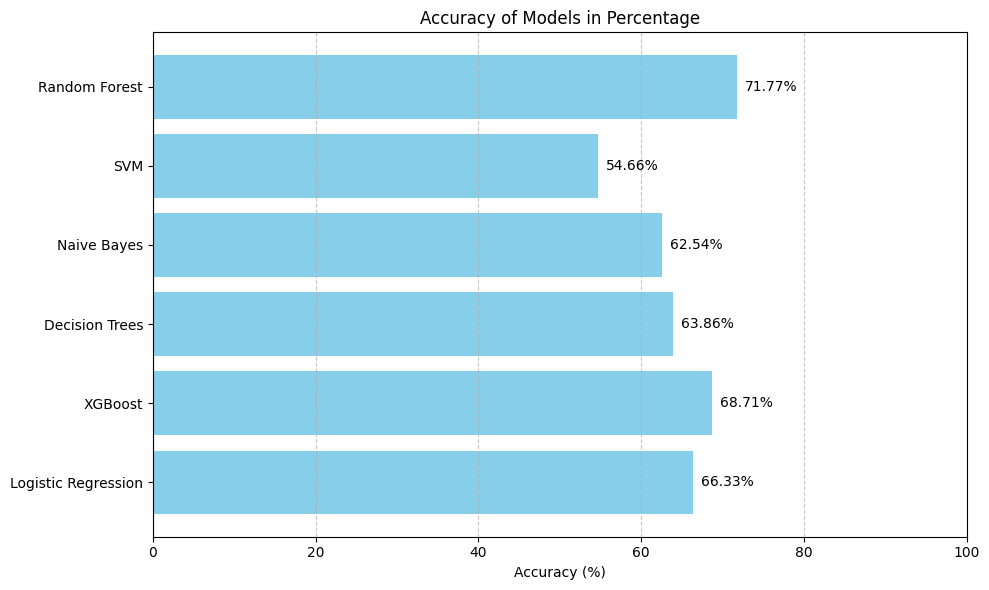

In [85]:
# Convert accuracy to percentage
results["Accuracy (%)"] = results["Accuracy"] * 100

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(results["Model"], results["Accuracy (%)"], color="skyblue")
plt.xlabel("Accuracy (%)")
plt.title("Accuracy of Models in Percentage")
plt.xlim(0, 100)  # Set limit to represent percentage scale
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add percentage values at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%',
             va='center', ha='left', color='black')

plt.tight_layout()
plt.show()



## model evaluate

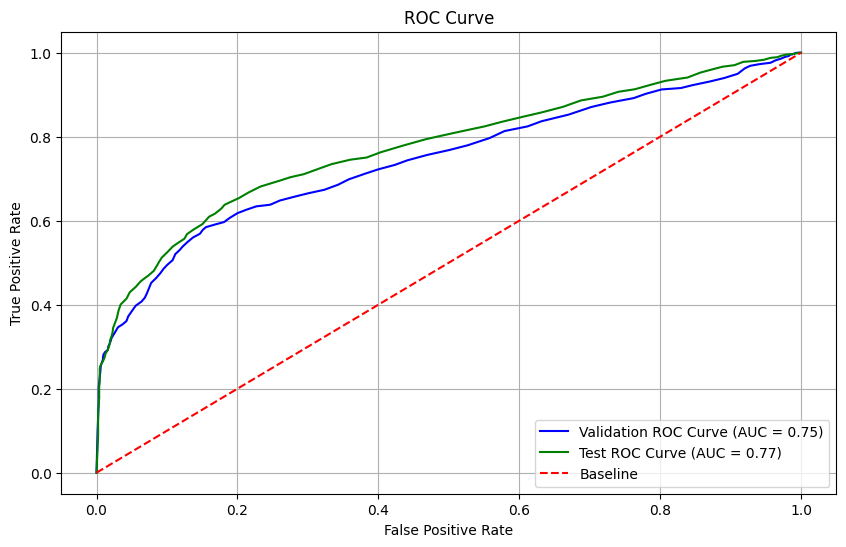

In [86]:
from sklearn.metrics import roc_curve, auc

# Probability prediction
y_val_prob_rf = rf_clf.predict_proba(X_val)[:, 1]  # Probability prediction
y_test_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# ROC Curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob_rf)
roc_auc_val = auc(fpr_val, tpr_val)

# ROC Curve fot test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob_rf)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, color='blue', label=f'Validation ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


The ROC curve illustrates the relationship between:  

- **True Positive Rate (TPR) or Sensitivity (y-axis):** The proportion of correct predictions for the positive class (e.g., late deliveries correctly predicted).  
- **False Positive Rate (FPR) (x-axis):** The proportion of incorrect predictions for the negative class (e.g., on-time deliveries predicted as late).  

The closer the curve is to the top-left corner, the better the model's performance.  

The Random Forest model demonstrates stable performance between the validation data (AUC = 0.75) and the test data (AUC = 0.77).  
The model's performance is fairly good, but there is room for improvement, such as through further parameter tuning.

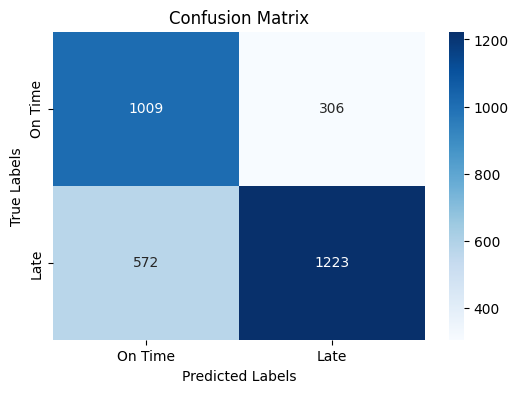

In [87]:
# generate and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Late'], yticklabels=['On Time', 'Late'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

True Positives (TP):

The model correctly predicted 1009 instances of "On Time" deliveries.

False Positives (FP):

The model incorrectly predicted 306 instances as "Late" while they were actually "On Time".

False Negatives (FN):

The model incorrectly predicted 572 instances as "On Time" while they were actually "Late".

True Negatives (TN):

The model correctly predicted 1223 instances of "Late" deliveries.

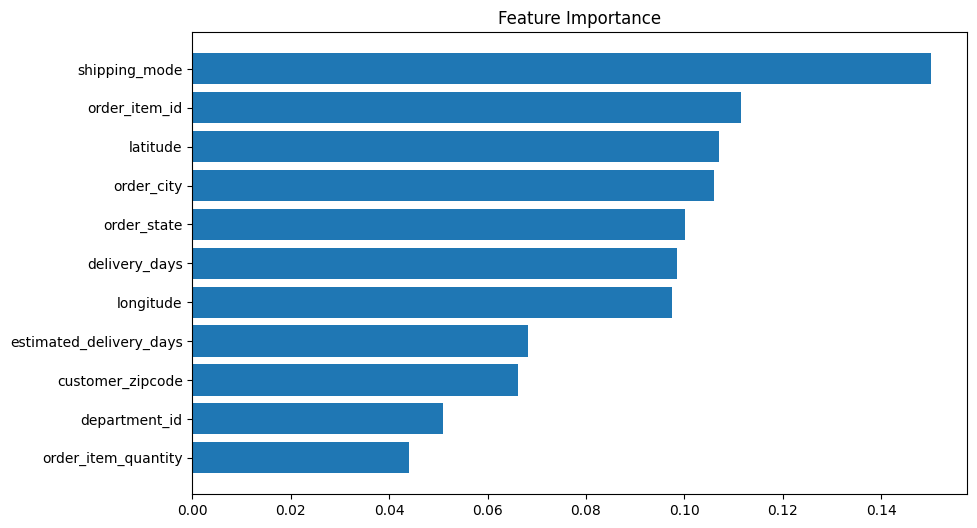

In [88]:
importances = rf_clf.feature_importances_
feature_names = X_train.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_indices], importances[sorted_indices])
plt.title("Feature Importance")
plt.show()


In [89]:
# initiate explainer for Random Forest model
rf_clf_expl = dx.Explainer(rf_clf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 9329 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 9329 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f1b7e49ce00> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.567, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.45, mean = 0.0102, max = 0.42
  -> model_info        : package sklearn

A new explainer has been created!


In [90]:
rf_clf_expl.model_parts().plot()

## Hyperparameter

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report

# Define model
rf_clf = RandomForestClassifier(random_state=42)

# Limit the parameter space to speed up execution
param_grid = {
    'n_estimators': [50, 100, 150],     # Fewer trees: Use a smaller number of estimators.
    'max_depth': [10, 20],              # Moderate depth: Focus on moderate tree depth.
    'min_samples_split': [5, 10],       # Moderate regularization: Apply balanced regularization.
    'min_samples_leaf': [2, 4],         # Regularization on leaves: Use constraints on leaf nodes.
    'max_features': ['sqrt', 'log2']    # More relevant features: Select features with higher importance.
}

# GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fitting on validation set
grid_search.fit(X_val, y_val)

# show best hyperparameter
print("Best Hyperparameters:", grid_search.best_params_)

# Model with best hyperparameter
best_rf = grid_search.best_estimator_

# evaluatin on validation set
y_val_pred_rf = best_rf.predict(X_val)
print("Random Forest - Validation with Hyperparameter Tuning\n", classification_report(y_val, y_val_pred_rf))

# Evaluasi on test set
y_test_pred_rf = best_rf.predict(X_test)
print("Random Forest - Test with Hyperparameter Tuning\n", classification_report(y_test, y_test_pred_rf))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Random Forest - Validation with Hyperparameter Tuning
               precision    recall  f1-score   support

           0       0.71      0.88      0.78      1314
           1       0.89      0.73      0.80      1796

    accuracy                           0.79      3110
   macro avg       0.80      0.80      0.79      3110
weighted avg       0.81      0.79      0.79      3110

Random Forest - Test with Hyperparameter Tuning
               precision    recall  f1-score   support

           0       0.63      0.81      0.71      1315
           1       0.82      0.65      0.73      1795

    accuracy                           0.72      3110
   macro avg       0.72      0.73      0.72      3110
weighted avg       0.74      0.72      0.72      3110



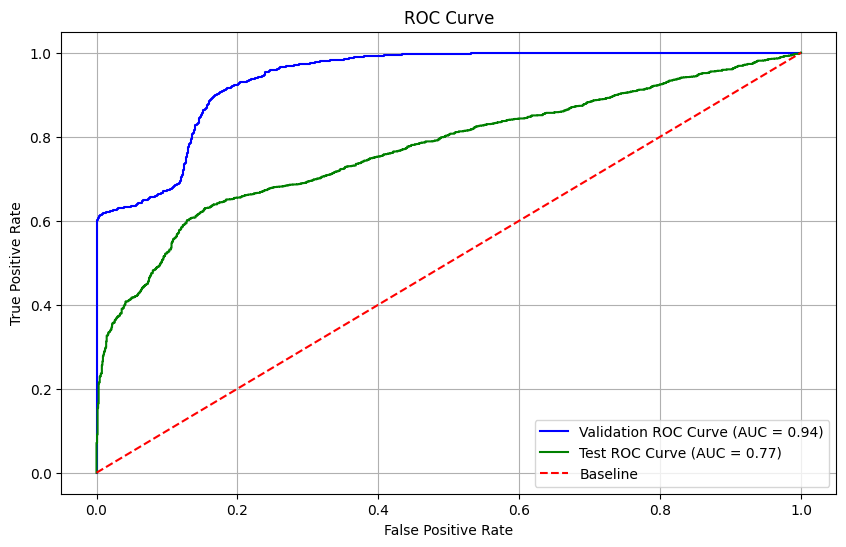

In [92]:
# Probability prediction
y_val_prob_rf = best_rf.predict_proba(X_val)[:, 1]  # Getting the probability of the positive class
y_test_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# ROC Curve for validation set
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_prob_rf)
roc_auc_val = auc(fpr_val, tpr_val)

# ROC Curve fot test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob_rf)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_val, tpr_val, color='blue', label=f'Validation ROC Curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


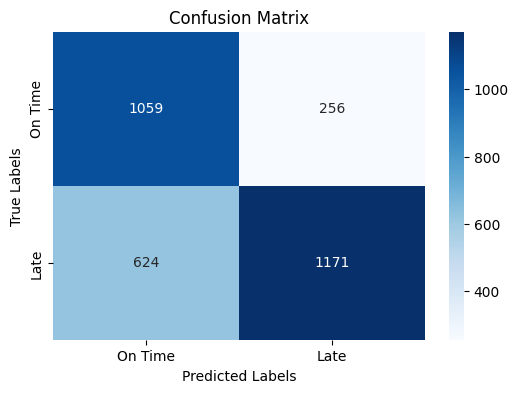

In [93]:
# generate and visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Late'], yticklabels=['On Time', 'Late'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

It seems that hyperparameter tuning is causing the model to overfit, as the untuned model performs better.